# Credit_Fraud_Detection_Score

    Accuracy: the proportion of the total number of predictions that are correct
    Precision: the proportion of positive predictions that are actually correct
    Recall: the proportion of positive observed values correctly predicted as such

Here: 

    Accuracy: Overall how often the model predicts correctly defaulters and non-defaulters
    Precision: When the model predicts default: how often is correct?
    Recall: The proportion of actual defaulters that the model will correctly predict as such

Which metric should I use?

    False Positive: A person who will pay predicted as defaulter
    False Negative: A person who default predicted as payer

False negatives are worse - look for a better recall

##### For better results, one can use synthetic sampling methods like SMOTE and MSMOTE along with advanced boosting methods like Gradient boosting and XG Boost.

In [281]:
# 1. Proper coding standards (well commented, well spaced) 
# 2. Data preprocessing 
# 3. Train-Test split 
# 4. Build model on train and predict its performance on test
# 5. Data Visualizations 
# 6. Performance of the model should be good. Accuracy, Recall, Precision > 80

In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [283]:
ls

 ccfd-Copy1.ipynb            creditcard2.csv
'CCFD - Final-Copy1.ipynb'   credit_card_default.csv
'CCFD - Final.ipynb'         Predicting_Credit_Default.ipynb
 ccfd.ipynb                 'Untitled Folder'/


In [284]:
credit = pd.read_csv('creditcard2.csv')

In [285]:
credit.size

8829017

In [286]:
credit.shape

(284807, 31)

In [287]:
credit.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [288]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [289]:
null_columns=credit.columns[credit.isnull().any()]

In [290]:
print(credit[credit.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [291]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [292]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [293]:
credit['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
5           3.67
6           4.99
7          40.80
8          93.20
9           3.68
10          7.80
11          9.99
12        121.50
13         27.50
14         58.80
15         15.99
16         12.99
17          0.89
18         46.80
19          5.00
20        231.71
21         34.09
22          2.28
23         22.75
24          0.89
25         26.43
26         41.88
27         16.00
28         33.00
29         12.99
           ...  
284777      1.00
284778     80.00
284779     25.00
284780     30.00
284781     13.00
284782     12.82
284783     11.46
284784     40.00
284785      1.79
284786      8.95
284787      9.99
284788      3.99
284789     60.50
284790      9.81
284791     20.32
284792      3.99
284793      4.99
284794      0.89
284795      9.87
284796     60.00
284797      5.49
284798     24.05
284799     79.99
284800      2.68
284801      2.69
284802      0.77
284803     24.79
284804     67.

In [302]:
#Extract all rows in Amount with values btw 100 and 150
len(credit[(credit.Amount >= 100) & (credit.Amount <= 150)].Amount)

17968

In [304]:
#Explore doing the same task using LOC function
(credit.loc[(credit['Amount'] >= 100) & (credit['Amount'] <= 150)]).Amount
#credit['Amount'].between(100,150)

0         149.62
3         123.50
12        121.50
56        120.96
77        135.51
90        149.90
122       104.94
139       124.67
158       142.71
169       148.43
171       110.40
179       137.00
192       113.00
207       148.81
230       127.69
269       127.75
283       137.30
288       101.00
333       100.37
342       120.00
365       122.36
382       109.15
403       101.00
432       140.60
485       105.87
543       146.25
578       102.13
603       121.48
645       139.75
670       114.00
           ...  
284231    117.00
284235    109.30
284271    103.00
284307    118.78
284340    131.37
284360    137.52
284373    110.90
284378    132.56
284395    113.46
284427    119.00
284449    131.98
284475    117.95
284512    118.90
284518    130.51
284532    144.37
284536    150.00
284543    122.55
284545    109.00
284594    148.45
284600    126.00
284616    114.90
284624    147.16
284626    125.68
284646    100.20
284699    127.69
284706    128.92
284724    138.18
284731    138.

In [215]:
credit1=credit[(credit['Amount'] <= 100) & (credit['Amount'] >= 150)]

In [216]:
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [217]:
credit['Amount'].between(100,150)

0          True
1         False
2         False
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
284777    False
284778    False
284779    False
284780    False
284781    False
284782    False
284783    False
284784    False
284785    False
284786    False
284787    False
284788    False
284789    False
284790    False
284791    False
284792    False
284793    False
284794    False
284795    False
284796    False
284797    False
284798    False
284799    False
284800    False
284801    False
284802    False
284803    False
284804    False
284805    False
284806    False
Name: Amount, Length: 28

In [218]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [219]:
credit[credit['Class']==1].describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


In [220]:
pd.set_option('display.max_columns', None)
credit[credit['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,6.754625,-8.948179,0.702725,-10.733854,-1.379520,-1.638960,-1.746350,0.776744,-1.327357,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,4.560720,-8.873748,-0.797484,-9.177166,-0.257025,-0.871688,1.313014,0.773914,-2.370599,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,6.439053,-7.520117,0.386352,-9.252307,-1.365188,-0.502362,0.784427,1.494305,-1.808012,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,5.588724,-7.148243,1.680451,-6.210258,0.495282,-3.599540,-4.830324,-0.649090,2.250123,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [221]:
credit[credit['Class']==1].count()

Time      492
V1        492
V2        492
V3        492
V4        492
V5        492
V6        492
V7        492
V8        492
V9        492
V10       492
V11       492
V12       492
V13       492
V14       492
V15       492
V16       492
V17       492
V18       492
V19       492
V20       492
V21       492
V22       492
V23       492
V24       492
V25       492
V26       492
V27       492
V28       492
Amount    492
Class     492
dtype: int64

In [222]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [223]:
from sklearn.preprocessing import StandardScaler
credit['amt'] = StandardScaler().fit_transform(credit['Amount'].values.reshape(-1,1))
credit['time'] = StandardScaler().fit_transform(credit['Time'].values.reshape(-1,1))
credit = credit.drop(['Amount','Time'],axis=1)

In [224]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amt,time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [225]:
#LinearModel #Done
from sklearn.linear_model import LogisticRegression,SGDClassifier
#SVM
from sklearn.svm import SVC
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
#RandomForest
from sklearn.ensemble import RandomForestClassifier
#Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split

In [226]:
x = credit[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','amt','time']]
y = credit['Class']

In [227]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3,random_state = 99)

### LogisticRegression 

In [228]:
#LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train,y_train)
result_lr = lr.predict(x_test)

In [229]:
lr.predict([[-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,-1.986644]])

array([0])

In [230]:
print(classification_report(y_test,result_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.91      0.64      0.75       157

    accuracy                           1.00     85443
   macro avg       0.95      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [231]:
print(confusion_matrix(y_test,result_lr))

[[85276    10]
 [   57   100]]


In [232]:
fpr,tpr,threshold = roc_curve(y_test,result_lr)
roc_auc = auc(fpr,tpr)
print (roc_auc)

0.818412711310359


### Support Vector Classification

In [233]:
#Support Vector Classification
svc = SVC(gamma='auto')
svc.fit(x_train,y_train)
result_svc = svc.predict(x_test)

In [234]:
svc.predict([[-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,-1.986644]])

array([0])

In [235]:
print(classification_report(y_test,result_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.98      0.66      0.79       157

    accuracy                           1.00     85443
   macro avg       0.99      0.83      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [236]:
print(confusion_matrix(y_test,result_svc))

[[85284     2]
 [   53   104]]


In [237]:
fpr,tpr,threshold = roc_curve(y_test,result_svc)
roc_auc = auc(fpr,tpr)
print (roc_auc)

0.8311984658289507


### Naive Bayes

In [238]:
#NaiveBayes
nb = GaussianNB()
nb.fit(x_train,y_train)
result_nb = nb.predict(x_test)

In [239]:
print(classification_report(y_test,result_nb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85286
           1       0.07      0.85      0.12       157

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [240]:
print(confusion_matrix(y_test,result_nb))

[[83402  1884]
 [   23   134]]


In [241]:
fpr,tpr,threshold = roc_curve(y_test,result_nb)
roc_auc = auc(fpr,tpr)
print (roc_auc)

0.9157064032283433


### XGBoost

In [242]:
import xgboost as xgb

In [243]:
xg = xgb.XGBClassifier()
xg.fit(x_train,y_train)
result_xg = xg.predict(x_test)

In [244]:
print(classification_report(y_test,result_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85286
           1       0.95      0.79      0.86       157

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [245]:
print(confusion_matrix(y_test,result_xg))

[[85280     6]
 [   33   124]]


In [246]:
fpr,tpr,threshold = roc_curve(y_test,result_xg)
roc_auc = auc(fpr,tpr)
print (roc_auc)

0.8948692828371708


Text(0.5, 0, 'False Positive Rate')

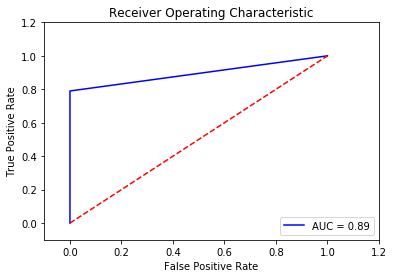

In [247]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Sampling

In [248]:
default_count = 492

default = np.array(credit[credit.Class == 1].index)
positive_predict = credit[credit.Class == 0].index

rand_predict = np.random.choice(positive_predict, default_count, replace = False)
rand_predict = np.array(rand_predict)

new_predict = np.concatenate([default,rand_predict])
new_credit_pred = credit.iloc[new_predict,:]

In [249]:
rand_predict.shape

(492,)

In [250]:
new_credit_pred.count()

V1       984
V2       984
V3       984
V4       984
V5       984
V6       984
V7       984
V8       984
V9       984
V10      984
V11      984
V12      984
V13      984
V14      984
V15      984
V16      984
V17      984
V18      984
V19      984
V20      984
V21      984
V22      984
V23      984
V24      984
V25      984
V26      984
V27      984
V28      984
Class    984
amt      984
time     984
dtype: int64

In [251]:
x_sampling = new_credit_pred.iloc[:,new_credit_pred.columns != 'Class']
y_sampling = new_credit_pred.iloc[:,new_credit_pred.columns == 'Class']

In [252]:
x_strain, x_stest, y_strain, y_stest = train_test_split(x_sampling,y_sampling, test_size=0.3, random_state=99)

### Logistic Regression on Sampling

In [253]:
lrs= LogisticRegression(solver='lbfgs')
lrs.fit(x_strain,y_strain.values.ravel())
result_lrs = lrs.predict(x_stest)

In [254]:
lrs.predict([[-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,-1.986644]])

array([1])

In [255]:
print(classification_report(y_stest,result_lrs))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       161
           1       0.96      0.92      0.94       135

    accuracy                           0.95       296
   macro avg       0.95      0.94      0.95       296
weighted avg       0.95      0.95      0.95       296



In [256]:
print(confusion_matrix(y_stest,result_lrs))

[[156   5]
 [ 11 124]]


In [257]:
fpr,tpr,threshold = roc_curve(y_stest,result_lrs)
roc_auc_lrs = auc(fpr,tpr)
print (roc_auc)

0.8948692828371708


Text(0.5, 0, 'False Positive Rate')

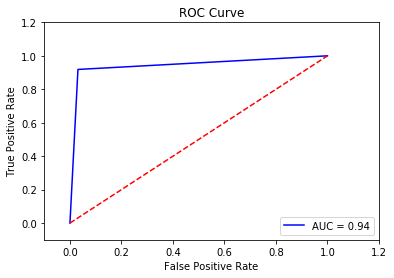

In [258]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc_lrs)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Advanced bagging techniques commonly used to counter the imbalanced dataset problem is SMOTE bagging. It follows an entirely different approach from conventional bagging to create each Bag/Bootstrap. It generates the positive instances by the SMOTE Algorithm by setting a SMOTE resampling rate in each iteration. The set of negative instances is bootstrapped in each iteration.

### XGBoost with Sampling

In [259]:
xgs = xgb.XGBClassifier()
xgs.fit(x_strain,y_strain.values.ravel())
result_xgs = xgs.predict(x_stest)

In [260]:
print(classification_report(y_stest,result_xgs))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       161
           1       0.95      0.93      0.94       135

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



In [261]:
print(confusion_matrix(y_stest,result_xgs))

[[154   7]
 [ 10 125]]


In [262]:
fpr,tpr,threshold = roc_curve(y_stest,result_xgs)
roc_auc_xgs = auc(fpr,tpr)
print (roc_auc)

0.8948692828371708


### Logistic Regression with SMOTE

In [263]:
from imblearn.over_sampling import SMOTE

In [264]:
oversampler=SMOTE(random_state=0)

In [265]:
x_train_smote,y_train_smote=oversampler.fit_sample(x_train,y_train)

In [266]:
#LogisticRegression with SMOTE
lr_smote = LogisticRegression(solver='lbfgs')
lr_smote.fit(x_train_smote,y_train_smote)
result_lr_smote = lr_smote.predict(x_test)

In [267]:
print(classification_report(y_test,result_lr_smote))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85286
           1       0.06      0.94      0.12       157

    accuracy                           0.97     85443
   macro avg       0.53      0.96      0.55     85443
weighted avg       1.00      0.97      0.99     85443



In [268]:
print(confusion_matrix(y_test,result_lr_smote))

[[83121  2165]
 [   10   147]]


In [269]:
fpr,tpr,threshold = roc_curve(y_test,result_lr_smote)
roc_auc_lr_smote = auc(fpr,tpr)
print (roc_auc_lr_smote)

0.9554602789475233


### Naive Bayes with SMOTE

In [270]:
#NaiveBayes
nb_smote = GaussianNB()
nb_smote.fit(x_train_smote,y_train_smote)
result_nb_smote = nb_smote.predict(x_test)

In [271]:
print(classification_report(y_test,result_nb_smote))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85286
           1       0.06      0.87      0.12       157

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [272]:
print(confusion_matrix(y_test,result_nb_smote))

[[83231  2055]
 [   21   136]]


In [273]:
fpr,tpr,threshold = roc_curve(y_test,result_nb_smote)
roc_auc_nb_smote = auc(fpr,tpr)
print (roc_auc_nb_smote)

0.9210733207756114


### XGBoost with SMOTE

In [274]:
xg_smote = xgb.XGBClassifier()
xg_smote.fit(x_train_smote,y_train_smote)
#result_xg_smote = xg_smote.predict(x_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)